<a href="https://colab.research.google.com/github/Code-Abbey/Decision-Tree-Random-Forest/blob/main/Decision_Tree_%26_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
#Load Dataset
df = pd.read_csv("/content/drive/MyDrive/Machine Learning/titanic-passengers.csv", delimiter=";")

In [3]:
#Show dataset head
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


**Dataset Info.**

In [4]:
df.shape

(891, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


**Finding Missing Value**

In [6]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,True,False
888,False,False,False,False,False,False,False,False,False,False,True,False
889,False,False,False,False,False,True,False,False,False,False,True,False


In [7]:
#Numbers of missing values in each column
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Replacing Missing Numerical Values with the appropriate values**

In [8]:
#Replacing Missing Numerical Values of the "Age" Feature
df["Age"].fillna(df["Age"].mean(), inplace= True)

**Replacing Missing Categorical Values with the appropriate values**

In [9]:
#Number of Elements per Category of the "Cabin" Feature
print(df["Cabin"].value_counts())

G6             4
B96 B98        4
C23 C25 C27    4
F33            3
D              3
              ..
E46            1
F E69          1
D48            1
A5             1
B37            1
Name: Cabin, Length: 147, dtype: int64


In [10]:
#Replacing Missing Categorical Values of the "Cabin" Feature
df["Cabin"].fillna("G6", inplace= True)

In [11]:
#Number of Elements per Category of the "Embarked" Feature
print(df["Embarked"].value_counts())

S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [12]:
#Replacing Missing Categorical Values of the "Embarked" Feature
df["Embarked"].fillna("S", inplace= True)

**Verifiy Data**

In [13]:
#Checkout for any missing values
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

**Data Visualization**

Distribution of the most important features

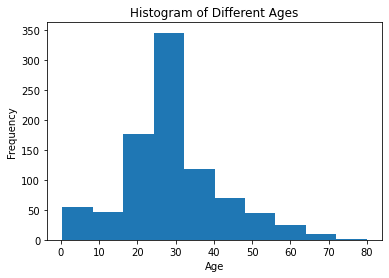

In [14]:
#"Age" Feature Distribution
import matplotlib.pyplot as plt 
plt.title ("Histogram of Different Ages")
plt.xlabel("Age")
df["Age"].plot.hist()

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

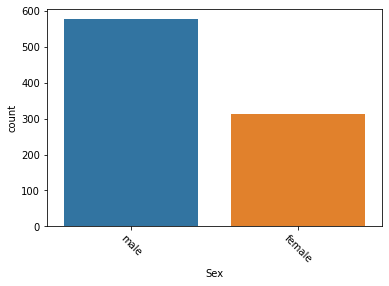

In [15]:
#"Sex" Feature Distribution
import seaborn as sns
sns.countplot(x= "Sex", data= df)
plt.xticks(rotation=-45)

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

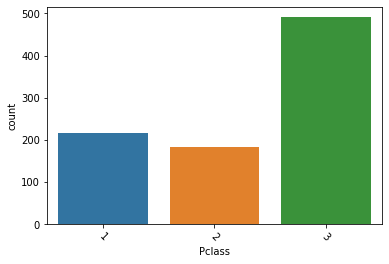

In [16]:
#"Pclass" Feature Distribution
sns.countplot(x= "Pclass", data= df)
plt.xticks(rotation=-45)

*The majority of passengers boarded 3rd class*

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

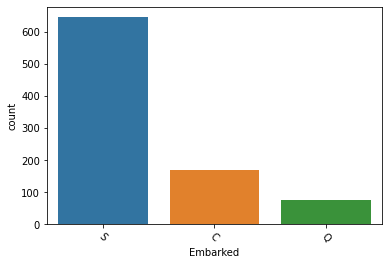

In [17]:
#"Embarked" Feature Distribution
sns.countplot(x= "Embarked",data= df)
plt.xticks(rotation=-45)

*The majority of passengers embarked at S (Southampton)*

**Data Correlation**

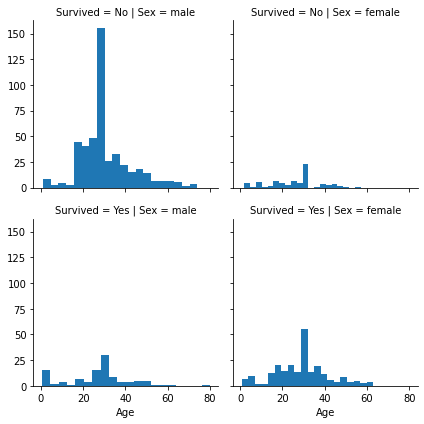

In [18]:
#Correlation between "Sex" and "Age"
g=sns.FacetGrid(df, row= "Survived", col="Sex")
g.map(plt.hist, "Age", bins=20)

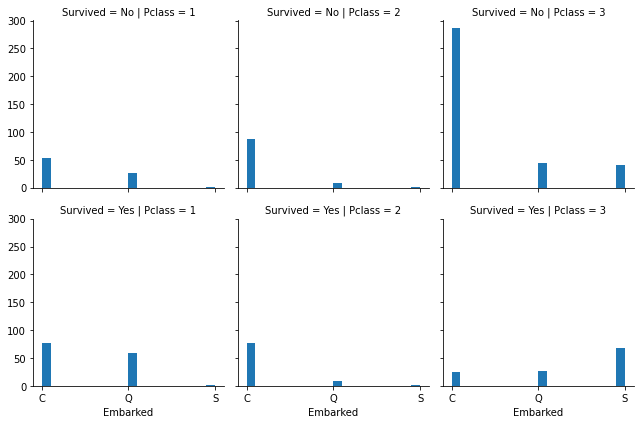

In [19]:
#Correlation between "Pclass" and "Embarked"
grid=sns.FacetGrid(df, row= "Survived", col="Pclass")
grid.map(plt.hist, "Embarked", bins=20)

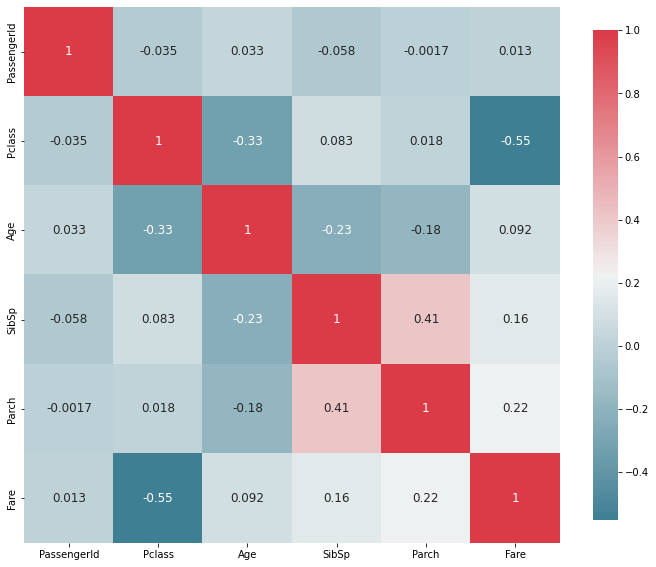

In [20]:
#Correlation Heatmap
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }
        
    )

plot_correlation_map(df)

  To start with, the number of male passengers we extracted from the "Sex" feature distribution is much higher than the number of female passengers. From the correlation between "Age" and "Sex" features above, we can deduce that females are more likely to survive than males. Also, according to the "Age" feature distribution, most passengers are in 15-35 years range. However, a large number of passengers that are between 15 and 25 years old did not survive the incident.

  We then visualized the correlation between "Pclass" and "Embarked" features which supplied us with the information that the 3rd class passengers are more likely to be dead than other classes and 1st class passengers are more likely to survive than other classes.

 In addition, passengers who embarked at C had a higher survival rate than people who embarked at S or Q. Last but not least, the function we defined was used to build a correlation heatmap which is, in fact, a graphical representation of correlation matrix representing correlation between all the different features of our dataset.

  The value of correlation can take any values between -1 and 1. Values closer to zero means there is no linear relationship between the two variables. The closer to 1 the correlation is, the more positively correlated the variables are. The closer to -1 the correlation is, the more negatively correlated the variables are. For example, the correlation between SibSp and Parch variables is equal to 0.41. They are somehow considered to have a moderate positive relationship which means that parents and siblings like to travel together. Also, the correlation between Pclass and Fare variables is equal to -0.55. They have a strong negative correlation which means that higher economic classes ("Pclasses") pay more for their trip ("Fare").

In [21]:
#Correlation grouby between "Pclass" and "Survived"
cleanup= {"Survived": {"No":0,"Yes":1}}
df.replace(cleanup, inplace=True)
df[["Pclass","Survived"]].groupby(["Pclass"], as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


**Drop useless columns**

In [22]:
new_data= df.copy()
new_data= new_data.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1)
new_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,2,male,28.0,0,0,13.0000,S
1,0,3,male,25.0,0,0,7.6500,S
2,0,3,male,20.0,0,0,7.8542,S
3,0,3,female,29.0,0,4,21.0750,S
4,0,1,male,31.0,1,0,52.0000,S


**Create a new column "Title"**

In [23]:
new_data['Title'] = df.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
new_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,2,male,28.0,0,0,13.0000,S,Mr
1,0,3,male,25.0,0,0,7.6500,S,Mr
2,0,3,male,20.0,0,0,7.8542,S,Mr
3,0,3,female,29.0,0,4,21.0750,S,Mrs
4,0,1,male,31.0,1,0,52.0000,S,Mr


In [24]:
#Number of Elements per Category of the "Title" Feature
print(new_data["Title"].value_counts())

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Major             2
Mlle              2
Lady              1
Ms                1
Jonkheer          1
Capt              1
the Countess      1
Mme               1
Sir               1
Don               1
Name: Title, dtype: int64


**Correlation between "Title" and "Age"**

In [25]:
new_data[["Age", "Title"]].groupby(["Title"], as_index=True).mean()

,Age
Title,
Capt,70.000000
Col,58.000000
Don,40.000000
Dr,40.242731
Jonkheer,38.000000
Lady,48.000000
Major,48.500000
Master,7.086662
Miss,23.341584


**Correlation between "Title" and "Fare"**

In [26]:
new_data[["Fare", "Title"]].groupby(["Title"], as_index=True).mean()

,Fare
Title,
Capt,71.000000
Col,31.025000
Don,27.720800
Dr,49.168457
Jonkheer,0.000000
Lady,39.600000
Major,28.525000
Master,34.703125
Miss,43.797873


**Correlation between "Title" and "Pclass"**

In [27]:
new_data[["Pclass", "Title"]].groupby(["Title"], as_index=True).mean()

,Pclass
Title,
Capt,1.000000
Col,1.000000
Don,1.000000
Dr,1.285714
Jonkheer,1.000000
Lady,1.000000
Major,1.000000
Master,2.625000
Miss,2.307692


**Correlation between "Title" and "Sex"**

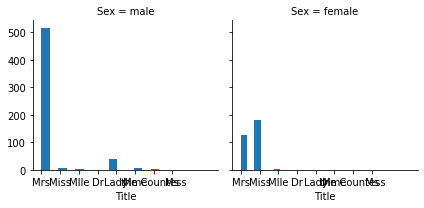

In [28]:
g=sns.FacetGrid(new_data, col="Sex")
g.map(plt.hist, "Title", bins=20)

**Creating a Dictionary**

In [29]:
Title_Dictionary={"Capt": "Officer",
                  
                  "Col": "Officer", 
                  
                  "Major": "Officer",
                  
                  "Dr": "Officer", 
                  
                  "Rev": "Officer",
                  
                  "Jonkheer": "Royalty",
                  
                  "Don": "Royalty", 
                  
                  "Sir": "Royalty",
                  
                  "Lady": "Royalty",
                  
                  "the Countess": "Royalty",
                  
                  "Dona": "Royalty", 
                  
                  "Mme": "Miss",
                  
                  "Mlle": "Miss",
                  
                  "Miss": "Miss",
                  
                  "Ms": "Mrs", 
                  
                  "Mr": "Mrs",
                  
                  "Mrs": "Mrs",

                  "Master": "Master" 
}

**Add the Dictonary as a column to the DataFrame**

In [30]:
new_data['Title'] = new_data['Title'].map(Title_Dictionary)
new_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,2,male,28.0,0,0,13.0000,S,Mrs
1,0,3,male,25.0,0,0,7.6500,S,Mrs
2,0,3,male,20.0,0,0,7.8542,S,Mrs
3,0,3,female,29.0,0,4,21.0750,S,Mrs
4,0,1,male,31.0,1,0,52.0000,S,Mrs


**New Number of Elements per Category of the "Title" Featuret**

In [31]:
print(new_data["Title"].value_counts())

Mrs        643
Miss       185
Master      40
Officer     18
Royalty      5
Name: Title, dtype: int64


**Visualize the same correlations**

In [32]:
#Between "Title" and "Age"
new_data[["Age", "Title"]].groupby(["Title"], as_index=True).mean()

,Age
Title,
Master,7.086662
Miss,23.352261
Mrs,32.389705
Officer,45.761062
Royalty,41.600000


In [33]:
#Between "Title" and "Fare"
new_data[["Fare", "Title"]].groupby(["Title"], as_index=True).mean()

,Fare
Title,
Master,34.703125
Miss,44.104416
Mrs,28.447283
Officer,35.786344
Royalty,42.150000


In [34]:
#Between "Title" and "Pclass"
new_data[["Pclass", "Title"]].groupby(["Title"], as_index=True).mean()

,Pclass
Title,
Master,2.625000
Miss,2.286486
Mrs,2.329705
Officer,1.444444
Royalty,1.000000


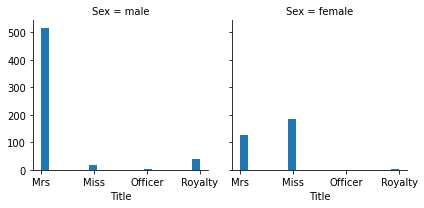

In [35]:
#Between "Title" and "Sex"
g=sns.FacetGrid(new_data, col="Sex")
g.map(plt.hist, "Title", bins=20)

In [36]:
#Create a new Feature "FamilySize" from "SibSp" and "Parch" Features
new_data["FamilySize"]= new_data["SibSp"]+new_data["Parch"]
new_data= new_data.drop("SibSp", axis= 1)
new_data= new_data.drop("Parch", axis= 1)

In [37]:
#Show the Head of the New Dataset
new_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,0,2,male,28.0,13.0000,S,Mrs,0
1,0,3,male,25.0,7.6500,S,Mrs,0
2,0,3,male,20.0,7.8542,S,Mrs,0
3,0,3,female,29.0,21.0750,S,Mrs,4
4,0,1,male,31.0,52.0000,S,Mrs,1


In [39]:
#Correlation between "Survived" and "FamilySize"
new_data[["Survived", "FamilySize"]].groupby(["FamilySize"], as_index=True).mean()

,Survived
FamilySize,
0,0.303538
1,0.552795
2,0.578431
3,0.724138
4,0.200000
5,0.136364
6,0.333333
7,0.000000
10,0.000000


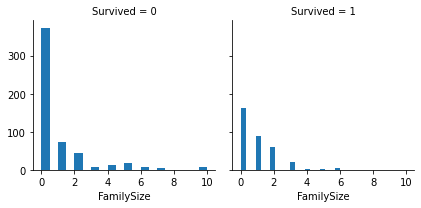

In [40]:
g=sns.FacetGrid(new_data, col="Survived")
g.map(plt.hist, "FamilySize", bins=20)

*"FamilySize" feature is useful as it shows us that survival rates are better when passengers are accompanied rather than alone.*

**Features Transformation**

In [41]:
from sklearn.preprocessing import LabelEncoder

In [42]:
encoder=LabelEncoder()
new_data["Title"]=encoder.fit_transform(new_data["Title"])
new_data["Embarked"]=encoder.fit_transform(new_data["Embarked"])
new_data["Sex"]=encoder.fit_transform(new_data["Sex"])
new_data

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,0,2,1,28.000000,13.0000,2,2,0
1,0,3,1,25.000000,7.6500,2,2,0
2,0,3,1,20.000000,7.8542,2,2,0
3,0,3,0,29.000000,21.0750,2,2,4
4,0,1,1,31.000000,52.0000,2,2,1
...,...,...,...,...,...,...,...,...
886,1,2,0,14.000000,30.0708,0,2,1
887,0,3,1,22.000000,7.2292,0,2,0
888,0,3,0,30.000000,8.6625,2,1,0
889,0,3,1,29.699118,7.8958,2,2,0


# **Decision Tree**
Features' Extraction

In [43]:
X = new_data[["Pclass", "Age", "Sex", "FamilySize", "Fare", "Title"]]
y = new_data["Survived"]

In [44]:
#Split the dataset into train and test sets
from sklearn.model_selection import train_test_split

In [45]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [47]:
#Applying Tree algorithm
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier#

In [48]:
dt = tree.DecisionTreeClassifier() 

In [49]:
#Fitting training data
model= dt.fit(X_train, y_train)

In [50]:
#Testing model's performance
y_pred= model.predict(X_test)

In [51]:
#Performance of the Decision Tree
from sklearn.metrics import accuracy_score

In [52]:
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.7653631284916201


#**Decision Tree Visualization**

In [53]:
import graphviz

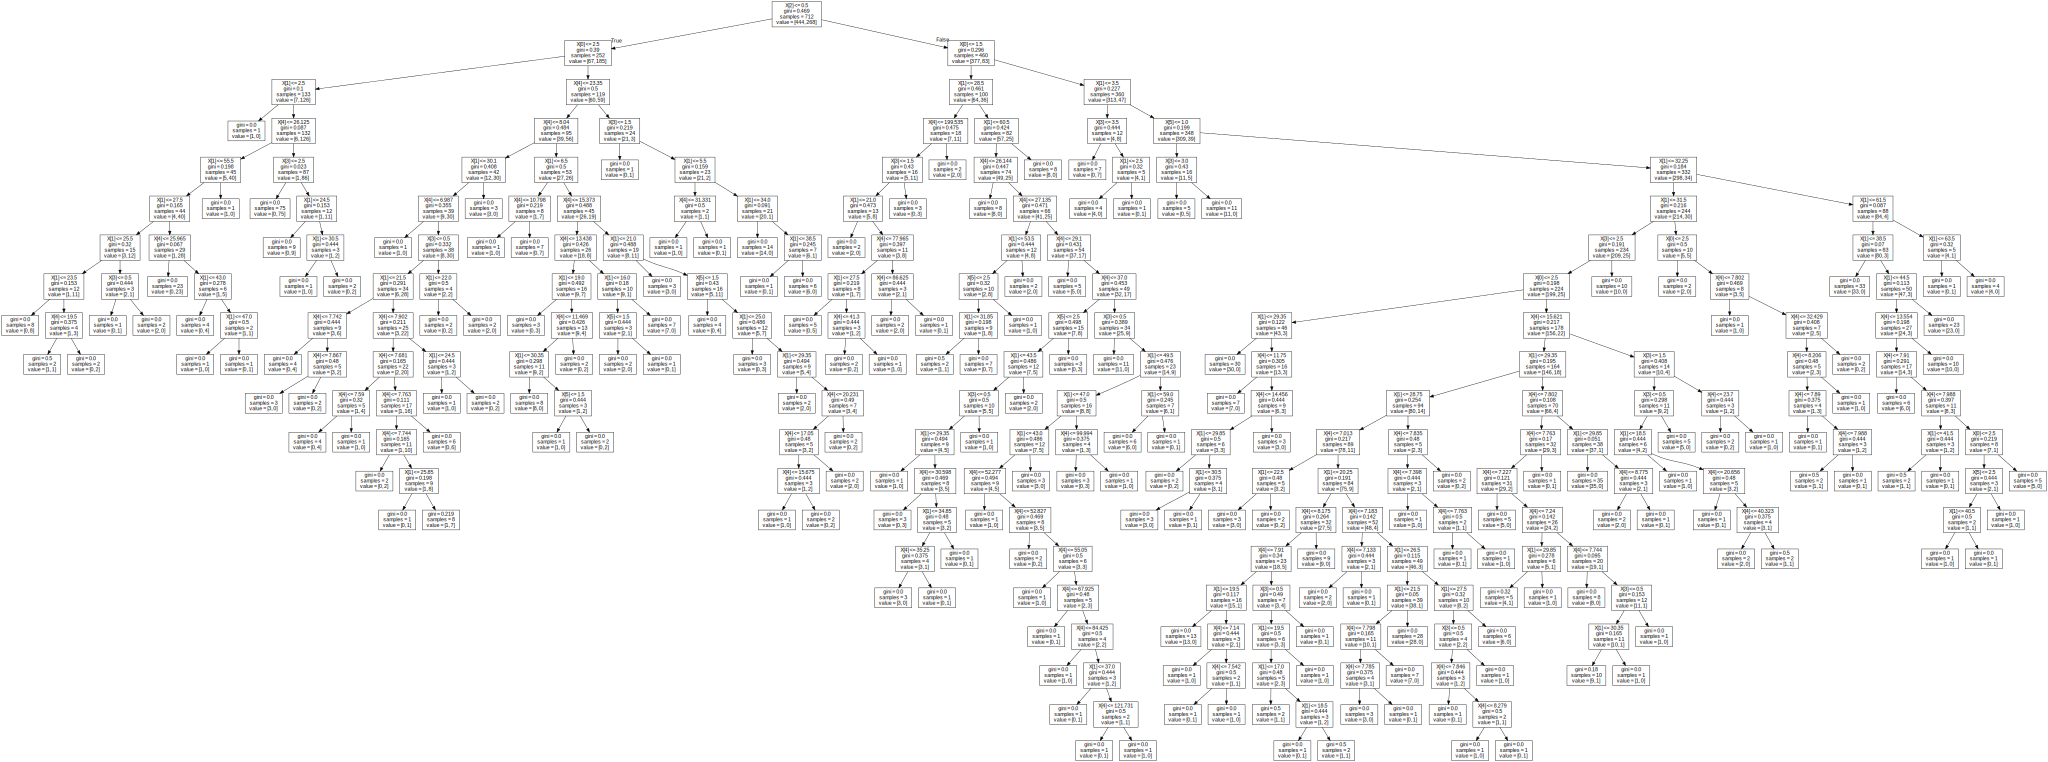

In [54]:
dot_data= tree.export_graphviz(model , out_file=None)
graph= graphviz.Source(dot_data)
graph.render("new_data")
graph

The first line of each node (except those of the final row) shows the splitting condition in the form "feature <= value". Next, we find the Gini Impurity of the node, which quantifies the purity of the node/leaf. A Gini score greater than zero implies that samples contained within that node belong to different classes. "Samples" is simply the number of observations contained in the node. Lastly, "Value" shows the class distribution of the samples ([count non_survived, count survived]). 
  
  The split that costs least is chosen since we always want to maximize our accuracy. In our example, the best split is the sex of the passenger. The tree first splits by sex, and then by class, since it has learned during the training phase that these are the two most important features for determining survival. Interestingly, after splitting by class, the main deciding factor determining the survival of women is the ticket fare that they paid, while the deciding factor for men is their age (with children being much more likely to survive).




**Changing Decision Tree Parameters**

In [55]:
dtree= tree.DecisionTreeClassifier(criterion= "gini", splitter= "random",  max_leaf_nodes= 10, min_samples_leaf= 5, max_depth=10)

In [56]:
model1= dtree.fit(X_train, y_train)

In [57]:
y_pred= model1.predict(X_test)

In [58]:
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.8044692737430168


By changing some of the decision tree parameters, our overall accuracy increased from 76.5% to 80.4%.

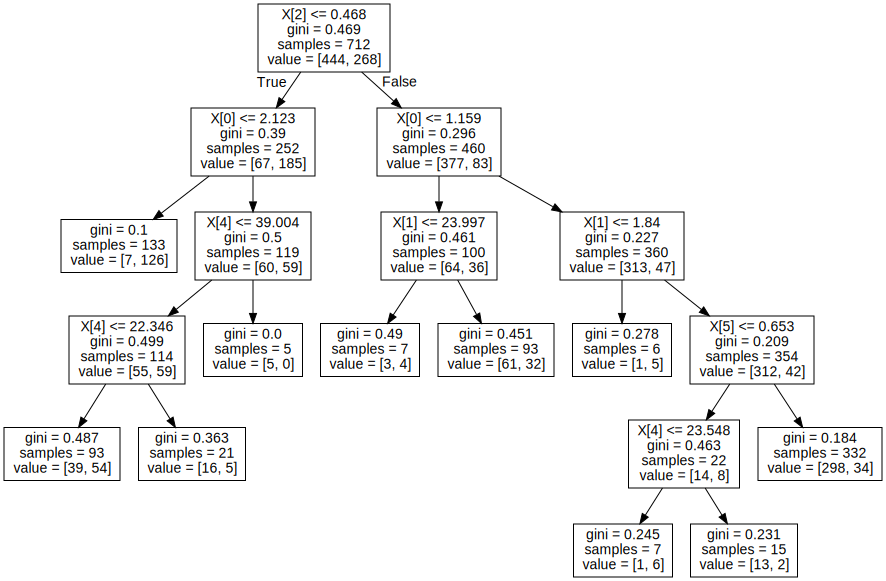

In [59]:
dot_data= tree.export_graphviz(model1 , out_file=None)
graph= graphviz.Source(dot_data)
graph.render("new_data")
graph

#**Random Forest**
Creating a Random Forest

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
clf= RandomForestClassifier()

In [62]:
#Training our Model
clf.fit(X_train, y_train)

RandomForestClassifier()

In [63]:
#Testing our Model
y_pred=clf.predict(X_test)

In [64]:
#Testing our Model's accuracy
from sklearn import metrics 

In [65]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8435754189944135


In [66]:
clf1= RandomForestClassifier(n_estimators=50)

In [67]:
clf1.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [68]:
y_pred=clf1.predict(X_test)

In [70]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8268156424581006


By changing the number estimators, the result shows that our random forest classifier's overall accuracy decreased from 84.6% to 82.3%.